In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import os 
sys.path.append('models/')
from Arima import ARIMA_Model, VAR_m
from exponential_regression import MultiDimensionalExponentialRegression, ExponentialRegression
from LinearRegression import LinearRegressionModel
from BayesianRegression import BayesianRegressionModel
from moving_average import MovingAverage
from SIRH import SIRH_model_2, Multi_SIRH_model
from useful_functions import get_classement, df_to_dict, concat_dico

In [33]:
coefs_esbs=pd.read_csv('./results/ensemble_models_coefs.csv')
coefs_esbs.index=['7', '14']
coefs_esbs.drop(columns=['Unnamed: 0'], inplace=True)
coefs_7_days=coefs_esbs.loc['7'][:-1]
coefs_14_days=coefs_esbs.loc['14'][:-1] 
intercept_7_days=coefs_esbs.loc['7'][-1]
intercept_14_days=coefs_esbs.loc['14'][-1]



In [34]:
models1Dnames=['ARIMA', 'Exponential', 'Moving Average', 'SIRH1', 'SIRH2', 'SIRH3', 'SIRH4', 'Linear Regression', 'Bayesian Regression']
models3Dnames=[ 'VAR', 'Exponential Multi', 'Moving Average Multi', 'SIRH Multi1', 'SIRH Multi2']
list_models=models1Dnames+models3Dnames
list_models.pop(11)


'Moving Average Multi'

Tes for sweden with vastraffik reports : 

In [35]:
df=pd.read_csv('current-covid-patients-hospital.csv')
# df['Daily hospital occupancy']
# ne récupérer que les lignes ou la ligne 'Entity' vaut 'SWE'
df=df[df['Entity']=='Sweden'][['Day', 'Daily hospital occupancy']]
#récupérer les lignes : ['Day', 'Daily hospital occupancy']
hosp=np.array(df['Daily hospital occupancy'])
# add 0 values to begin from 2 march 
hosp=np.concatenate((np.zeros(11),hosp))
# from https://ourworldindata.org/covid-hospitalizations



In [36]:
# mobility : début = 2 mars 2020
df_mobility=pd.read_csv('mobility_bis.csv')
df_mobility.drop(columns=['Unnamed: 0'], inplace=True)
mobility=np.array(df_mobility['mobility'])


In [37]:
n_infected= [0,0,0,0,0,0,0,0,0,0,0,1,2,10,13,13,18,31,61,86,145,178,224,325,424,620,772,923,993,1060,1141,1259,1384,1520,1693,1821,1928,2099,2309,2601,2857,3190,3455,3697,4070,4494,4841,5326,5746,6033,6288,6587,7242,7781,8341,8529,8823,9189,9545,9931,10422,10763,11368,11814,12114,12490,13135,13781,14453,15145,15090,15316,15777,16238,16622,16782,16828,16574,16233,16354,16671,17027,17073,17120,16984,16809,16869,17160,17421,17599,17683,17418,16989,16887,17165,17512,17415,17225,16870,16298,16315,16761,16997,17029,17003,16799,16532,16879,17518,18087,18468,18869,18864,18625,18793,19451,20433,20972,21603,21978,21708,22035,22985,24012,24840,25235,25323,25112,25509,26608,27815,28345,28749,28730,28372,28667,29209,29246,29033,28681,28006,27175,26646,26462,26318,25715,24647,23662,22439,21577,21470,21072,20131,18958,17655,16556,15989,15900,15396,14307,12871,11730,10568,9884,9752,9327,8821,8394,8010,7354,7155,7173,7347,7447,7294,7220,6924,6812,7123,7396,7447,7504,7462,7241,7224,7428,7648,7755,7756,7696,7491,7527,7707,7880,7799,7677,7506,7296,7155,7288,7336,7289,7126,6919,6606,6531,6694,6812,6649,6497,6340,6102,6096,6325,6481,6556,6642,6588,6423,6529,6910,7289,7607,7993,8116,8104,8351,8916,9443,9905,10404,10579,10473,10676,11395,12041,12639,13108,13363,13233,13664,14474,15222,15832,16681,16989,16873,17365,18521,19826,21054,22368,23305,23189,23932,26179,29190,31839,35206,37560,38145,39253,42704,46811,50768,54391,58008,59322,62536,66871,71943,76591,82353,84963,85365,87211,91348,95537,101856,105743,108569,109124,111523,116682,121681,126166,129237,129800,128497,128989,133512,138487,141864,144720,144840,142189,141520,146867,151541,153735,155741,156715,153040,153064,158484,164762,169942,172895,170795,169087,169752,173922,181418,180780,177507,173570,170316,173583,179700,186679,187857,183928,179473,174889,177006,182748,183994,183696,180988,179030,173630,171740,174016,177077,174820,170199,162718,156051,152654,153634,153420,151021,143368,140699,138053,137971,138948,135962,129459,123253,118949,117495,116515,118076,114829,110680,108911,104092,99408,96197,97927,97632,96096,93068,91092,88098,87837,90792,93641,93042,92121,90703,88580,88750,93008,96099,96737,97215,97949,94937,95068,100094,103412,103978,104309,104364,102555,102204,107119,110940,112201,112841,112987,110457,110399,115974,120502,122032,122472,122718,120270,120176,126229,131391,132347,133660,134023,131419,131270,138489,143939,144710,146650,145159,142527,142164,147515,153338,155151,157425,157709,155088,154589,162432,166840,167701,167721,172720,169479,162390,168324,173353,171970,169773,174360,163429,166487,166563,170752,168227,164800,170134,164862,157657,163242,166663,165563,162973,159678,153719,152140,154455,156293,151355,146794,143789,138077,136675,137303,138030,134661,128278,124317,119067,115689,116662,115037,107869,101011,101293,97301,89015,90078,87231,82470,76979,77734,72233,62995,62547,60933,55351,50579,47183,47342,40787,39379,36058,34847,32036,32053,26564,25331,25261,24446,22091,22120,20709,20627,20487,18800,17455,14953,13912,13913,12835,11504,11652,11426,10483,9886,9893,8678,8596,8808,9158,9523,9826,9836,7654,7682,8203,8109,8081,8144,7780,7782,8590,9230,9444,9816,9942,9945,9665,10487,11450,11893,12346,12906,12912,12451,13939,15133,15752,16413,17080,17087,16730,18172,19483,20133,20642,21108,21112,20636,21894,23149,23825,24464,24728,24109,23424,25779,26800,26750,27214,27681,27679,26047,28223,29610,29533,29805,30254,30252,29202,30315,31405,30837,30491,30067,29038,29032,29163,30055,29082,28592,27794,27791,26520,26669,27550,26056,25795,25396,25392,23957,23823,24554,23223,22570,21765,21775,20298,19900,20800,19494,19048,18457,18465,17464,17704,18531,18138,18056,18202,18725,18272,18090,19352,19187,19418,19543,20403,20035,19862,21037,20672,20777,20673,21264,20197,20698,21987,22907,21924,22040,22868,22509,22499,23807,23940,24241,24775,25865,24677,25631,26886,28471,29324,30462,32219,31040,31520,33883,35678,36734,38059,40139,40236,41754,44214,46972,48717,50573,52962,53509,55307,58243,61691,64515,67483,70866,71750,73465,76569,80744,83821,89628,89876,89552,93656,100260,109849,118676,129271,132115,133478,143460,158047,179928,197625,210990,230477,243909,256146,275253,299153,321197,343375,369174,382918,407107,440995,478609,517609,552294,589965,615773,643828,686328,721870,766522,795123,829411,832943,847095,877213,903211,913994,915664,935598,927915,917599,901148,902051,886542,865876,868661,843714,820029,777177,757007,721901,684742,686663,604282,606525,541311,510603,466436,428525,429955,377119,339089,292770,270489,231749,198007,199242,171219,147057,119218,111775,93812,79518,80312,73236,68248,66012,65284,62323,59594,60191,56281,53782,53396,51255,49414,50544,47787,44668,42612,42219,42177,38620,39361,37230,35268,33577,33328,33804,31180,31791,30027,28581,27570,27519,27787,25811,26115,24460,22701,21507,21373,21687,19756,20161,19097,17832,17062,17507,17174,15842,16240,15338,14635,14140,14587,14453,13556,13860,14022,12400,11971,12332,12182,11246,11466,11561,10425,10325,10614,10830,10674,10896,11002,9859,9674,9761,9635,9776,9465,9151,8839,8612,8645,8894,8330,8496,8258,8323,7822,8002,8473,8294,8662,8781,8199,8208,8588,8775,9009,9356,8803,8558,8933,9326,9885,9966,10309,10206,10375,10664,11346,12064,12364,13083,13163,13376,13521,14106,14803,15214,15873,16224,15655,15957,16799,17696,18466,19502,19211,19081,19415,20460,21374,21260,22350,22197,22474,22179,23200,23939,23687,24674,24469,24748,24021,24836,26029,25746,26792,26480,26024,26027,26852,27879,27577,28807,28381,27721,27474,28244,29360,28767,29900,29188,28396,28024,28644,29169,28490,29399,28560,27687,27397,27961,28585,27562,28270,27350,26411,26143,26432,27099,26127,26979,26081,24997,24375,24880,25511,24390,25228,24243,23324,22880,23517,24269,23334,24114,23643,23044,22879,23670,24578,23916,33028,32454,31889,31709,32315,32744,31960,32549,32001,31376,31029,31322,31715,30661,31178,30532,29871,29538,29843,30214,29188,29670,29013,28400,28070,28438,28867,27694,28217,27437,26654,17983,18366,18768,18083,18531,18171,17643,17645,18066,18475,17958,18522,18216,17847,17816,18227,18648,17582,18173,17866,17591,17558,18051,18704,18423,19109,18822,18488,18822,19462,20615,20685,21868,21956,21706,22348,23900,25486,25739,27523,27842,27741,28693,30736,32945,34130,36334,36792,36838,37933,40134,42565,43800,45544,45480,45277,45125,45998,47883,47963,49682,49100,48330,48108,48805,49469,47721,48182,46673,45219,44106,43980,44103,41075,41509,39303,37087,35206,34451,34051,30262,30482,27907,25712,24104,23544,23111,20172,20354,18286,16546,14957,14353,14193,992,1167,1251,1298,1465,1633,1817,8141,8290,7680,7218,6885,6806,6820,6169,6259,5955,5711,5551,5516,5549,5139,5226,5051,4864,4764,4773,4807,4484,4594,4339,4173,4126,4170,4250,4078,4216,4075,3966,3944,3997,4106,3906,4050,3964,3908,3982,4124,4246,4211,4368,4334,4299,4337,4448,4592,4621,4632,4603,4587,4624,4758,4900,4747,5087,5013,4980,4942,5002,5144,5197,5216,5170,5125,5183,5278,5415,5188,5410,5351,5267,5269,5372,5483,5309,5525,5433,5354,5270,5366,5460,5216,5410,5283,5199,5273,5329,5334,5144,5297,5169,4949,4880,4937,5005,4678,4893,4737,4604,4540,4558,4556,4237,4383,4246,4118,4066,4058,4046,3823,3906,3755,3660,3612,3575,3573,3310,3390,3287,3153,3108,3093,3111,2858,2784,2671,2616,2577,2568,2564,2332,2391,2308,2236,2189,2195,2196,2153,2095,2030,1890,1940,1927,1913,1825,1803,1749,1670,1631,1610,1596,1534,1469,1410,1363,1334,1317,1310,1332,1352,1371,1377,1207,1236,1264,1314,1346,1362,949,983,1022,1062,1082,1128,1154,1175,1213,1244,1291,1336,1370,1396,1420,1253,1313,1349,1395,1428,1389,1402,1443,1510,1588,1641,1652,1722,1702,1761,1838,1888,1945,1997,1988,2055,2109,2210,2301,2343,2375,2440,2446,2535,2631,2721,2745,2683,2776,2759,2779,2835,2916,2869,3023,2987,2939,2962,3030,3114,3093,3002,3065,3005,3047,3083,3129,3002,3137,3091,3064,3080,3156,3263,3277,3150,3312,3316,3433,3558,3712,3680,3686,3674,3686,3855,4135,4375,4536,4629,4891,4986,5266,5652,6038,6284,6545,6914,7067,7527,8021,8508,8875,9181,9567,9686,10087,10570,11025,11317,11376,11791,11593,12132,12606,12949,13162,12985,13424,13360,13537,13835,14094,14088,13869,12997,13488,13859,14059,14244,14022,13294,13788,13461,13295,13518,13791,13605,13365,13015,12152,12809,12953,13045,12841,12559,11656,11952,11627,11523,11632,11414,11191,10906,10623,10488,10697,10646,9968,9633,9225,8902,8568,8403,8314,7925,7499,6547,7105,6793,6646,6545,6142,5738,5025,5199,4911,4803,4739,4593,4054,4160,3823,3518,3346,3223,3169,2691,2777,2575,2426,2353,2314,2205,1930,2001,1877,1775,1736,1705,1615,1429,1476,1413,1378,1357,1358,1293,1160,1207,1148,1144,1132,1130,1085,1050,926,974,936,925,926,875,861,816,782,761,756,751,720,693,663,630,615,615,616,584,563,530,476,530,522,521,482,466,448,445,419,406,388,368,352,331,314,288,305,292,268,250]        
# from https://www.worldometers.info/coronavirus/country/sweden/#coronavirus-cases-linear
# beginning at 2020-02-15
# attention 2020 est bissextile
# delete first 15 days to begin on 2 march
n_infected=n_infected[16:]

In [38]:
data3D=np.array([hosp[:306], n_infected[:306],mobility , [np.nan]*306])
df=pd.DataFrame(data3D)
df.columns=[str(i) for i in range(306)]
df.index=['n_hospitalized', 'n_infected', 'mobility', 'R_eff']
# set save_data = True to save the data
save_data=False
if save_data:
    df.to_csv('./all_pandemics/pandemic_final_test.csv')

Data for sweden for google reports

C:\Users\grego\AppData\Local\Temp\ipykernel_18068\61372351.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('2020_SE_Region_Mobility_report.csv') # from https://www.google.com/covid19/mobility/


Text(0.5, 1.0, 'Relative mobility in Sweden, from Google')

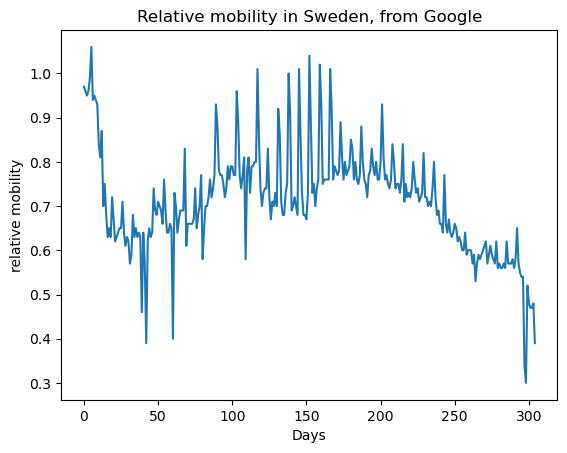

In [31]:
df=pd.read_csv('2020_SE_Region_Mobility_report.csv') # from https://www.google.com/covid19/mobility/ 
ar=np.array(df['transit_stations_percent_change_from_baseline'])
dat=np.array(df['date'])
df_suede=df[['date', 'transit_stations_percent_change_from_baseline']][df['sub_region_1'].isnull()] # begins the 15 feb 2020
mob_suede=np.array(df_suede['transit_stations_percent_change_from_baseline'])[16:]
mob_suede=mob_suede/100 + 1

plt.plot(mob_suede)
# plt.plot(mob_france)
plt.xlabel('Days')
plt.ylabel('relative mobility')
plt.title('Relative mobility in Sweden, from Google')

In [46]:
data3D=np.array([hosp[:305], n_infected[:305],mob_suede , [np.nan]*305])
df=pd.DataFrame(data3D)
df.columns=[str(i) for i in range(305)]
df.index=['n_hospitalized', 'n_infected', 'mobility', 'R_eff']
# set save_data = True to save the data
save_data=True
if save_data:
    df.to_csv('./all_pandemics/pandemic_test_sweden.csv')

DATA FOR FRANCE 

In [10]:
df=pd.read_csv('current-covid-patients-hospital.csv')
# df['Daily hospital occupancy']
# ne récupérer que les lignes ou la ligne 'Entity' vaut 'SWE'
df=df[df['Entity']=='France'][['Day', 'Daily hospital occupancy']]
#récupérer les lignes : ['Day', 'Daily hospital occupancy']
hosp_france=np.array(df['Daily hospital occupancy']) # begins 18 mars 2020
# add 0 values to begin from 2 march 
hosp_france=np.concatenate((np.zeros(15),hosp_france))
# from https://ourworldindata.org/covid-hospitalizations



In [11]:
n_infected_france = [-3,-3,-4,-6,-6,-6,-6,-9,-9,-10,-8,-4,15,33,71,98,154,174,241,367,576,840,1073,1247,1582,2019,2546,3242,3991,4795,5874,6254,7442,8332,9431,10997,11689,14991,15894,17706,19857,22268,26140,26708,29542,34414,36833,35909,37965,39360,39801,41457,41386,42455,43059,44293,45029,45139,46461,49609,48415,48206,46206,46337,46061,46548,46669,46311,45867,45684,45611,45479,47853,47494,47401,46925,46534,46758,46688,46332,45666,48050,47403,46943,43060,38913,36224,35270,33070,28153,26044,23827,23716,21683,21051,19389,17018,15557,14137,12471,11473,7832,7424,9924,10077,11585,11399,11055,10865,10615,10811,11037,11468,11331,11040,11029,11244,11277,11725,12112,12160,12046,12191,9523,9405,8463,8826,8778,8845,9000,8356,7783,8730,8898,9190,9075,9072,9534,9471,9523,9667,10124,9966,9982,10166,9988,10003,10364,10641,10426,10830,11220,10231,10526,10848,11397,11217,10904,11223,11674,12208,12564,13354,13390,13448,14171,14846,15481,14854,17230,17272,17857,18947,19667,21002,22100,23681,23870,24244,25616,27061,28776,30927,33274,33057,33851,36103,39317,43621,44355,48429,49289,50799,54389,57977,62992,66200,70543,72124,74430,78510,82555,87872,93067,99240,101084,103681,107253,112186,117633,122948,127854,130532,132806,136253,139269,146554,154141,161167,161464,164271,169822,176504,183305,190194,196688,194366,193872,196689,200972,202461,211647,217660,215062,215723,223374,227985,234405,249727,259865,258454,258380,264475,278386,288403,308396,332577,337450,344604,356528,384188,407706,438540,482577,497857,511625,528806,554424,575369,593706,630983,669894,684606,695750,728500,756650,811974,837605,839129,836727,833155,826658,808179,791308,793555,772840,752276,734207,707870,695896,667418,628661,596927,565638,524626,478773,407141,380888,369338,350464,322561,302811,290578,269171,253928,253627,243198,229431,223280,214711,210512,211253,217898,212181,207723,211526,216964,219867,227169,235422,233277,231148,233244,243016,249904,242463,247541,237450,234447,246371,252490,257559,249989,258835,251787,254484,261171,266829,268939,275863,285386,277679,282205,284287,285193,302252,314061,326901,319713,317040,323475,326760,345365,356096,369623,354374,351283,356175,359888,362404,370331,385020,370563,370079,374897,376940,377628,381329,396324,378220,370793,373175,371083,368059,370682,382230,365611,358736,359907,359572,359313,362256,378866,361326,355416,362990,366053,370389,374407,389080,375785,373411,378784,383080,385216,391560,407935,394550,392940,400262,403125,405807,413045,433406,420650,419201,431493,440682,451074,465519,489805,503614,501825,509436,530207,547628,567141,596878,601853,599995,613828,637693,653570,647420,698519,681965,700075,696121,678102,683637,695558,693046,677707,683078,681074,677485,671689,670606,671301,651568,652123,637397,625798,637576,611028,622411,573756,573317,588023,574223,556406,547749,549017,515841,497885,486582,472758,457052,448982,450701,413908,399666,387636,375550,351519,343279,350782,325475,312028,304996,297470,286210,289560,295748,275108,253740,246061,242040,233893,236040,241514,224068,213743,204254,205874,198070,191662,193619,178594,166726,156875,148545,139805,134139,134786,132241,122813,111968,102726,95244,89361,89973,80586,74036,68213,63256,58599,55674,56077,50539,47319,45309,44098,42814,42972,44840,42374,42903,44946,46210,48173,51053,54837,53869,58473,65389,67010,75784,85161,97195,99017,114728,133607,152851,169391,192467,206931,208609,231413,254889,275507,295083,314311,332674,330870,348812,373977,389525,403639,416887,433185,420734,427764,436783,445745,446569,455772,471639,450534,450688,453890,453526,452409,455439,467587,445849,441857,439154,433743,426451,423601,431469,406629,395096,384213,373701,362750,354924,359539,334414,320493,309400,298047,285400,277735,280265,257417,243977,233506,223399,213181,206989,209022,191072,181217,172195,164954,157510,153132,154811,141508,135477,130361,125585,120929,118214,119917,110687,107076,103935,101177,98229,97172,99655,92902,91950,91344,90637,90728,90940,93419,87675,87766,88626,89804,91228,93781,97667,93367,95018,96944,98936,100641,104015,109234,105226,101619,106517,109912,114032,119860,127365,123583,130020,135801,142054,139592,149265,160465,157050,170323,184153,198084,211946,228322,246213,249361,269761,292867,317371,342185,370882,400344,396048,431349,468375,512924,548112,587318,626349,617716,656461,697474,733105,788430,799808,838407,819794,850693,882949,909342,930278,957243,997447,965196,988413,1024328,1066069,1108581,1171023,1187400,1158604,1277037,1428388,1579296,1757767,1933124,1979539,1983416,2189308,2460799,2664194,2933883,3189130,3470204,3491078,3774894,4045100,4256319,4481113,4778039,5025835,4947974,5204565,5434633,5627602,5809339,6140293,6374498,6211015,6380324,6547060,6611004,6660843,6697229,6852832,6567119,6622263,6632409,6577402,6493780,6430378,6483714,6064658,5863484,5630285,5370470,5112507,4929672,4907807,4432369,4146609,3853290,3592121,3342259,3169605,3145985,2746001,2523803,2320685,2146300,1989989,1888260,1884884,1662944,1563147,1467842,1396697,1335874,1303051,1321992,1194091,1188415,1165272,1157585,1153304,1166842,1210091,1131406,1181230,1223303,1266969,1310929,1366483,1434315,1378578,1501677,1587044,1677867,1767763,1862006,1957710,1894007,2042282,2136503,2233425,2309616,2381374,2464824,2375736,2469945,2530149,2591385,2642015,2702474,2785991,2630573,2675794,2673592,2667382,2653241,2654740,2711961,2514278,2370585,2356940,2312360,2268674,2247050,2278391,2089197,2024772,1933709,1844721,1755924,1697849,1709112,1526939,1447590,1358179,1277002,1205655,1157011,1166533,1148344,1049091,985410,933080,885268,856797,865636,774043,750095,720340,695276,670128,655930,664147,601489,585587,563405,544438,511274,505554,514626,462802,457654,447769,440378,435052,437384,451980,414428,396039,421996,437850,455005,415572,490583,466936,510390,541118,589388,616417,666707,690389,662117,731179,783771,838519,892600,973545,1019293,1019076,1112533,1197095,1313295,1438351,1561012,1577792,1528214,1682880,1784436,1895060,1985806,2102246,2172695,2090147,2194222,2242029,2282107,2224154,2281911,2337952,2208348,2217842,2174497,2130292,2082021,2054418,2080009,1884600,1817558,1714947,1625535,1554668,1485387,1492559,1317756,1244653,1164167,1174942,1081532,1036417,1040192,911050,859296,805531,755503,709615,680832,685984,602921,550566,534737,512828,491808,480177,487748,437205,427393,414914,404172,393763,390096,399107,364637,364920,359866,355887,351097,350388,358715,355777,346957,343508,343126,342370,347083,359487,335059,355611,369365,384512,395370,414439,433768,411584,444170,463789,485857,507781,532930,560844,541386,594894,628433,660724,689467,719658,752525,719327,774925,808253,845101,873057,907217,944616,902128,958625,988139,1014826,1035480,1059553,1094020,1029742,1064009,1075669,1084238,1086717,1093058,1115821,1033471,1026551,1002270,978227,946750,926867,933941,842894,804530,745959,729331,703352,688263,709432,615924,593476,565430,543430,526057,500182,520428,466709,474485,472313,479845,494312,524943,535373,535170,594256,601424,651978,644321,671513,705535,674190,737309,778620,821535,874975,900757,934736,896300,966925,1009370,1043821,1062210,1109520,1126577,1072608,1120486,1140204,1154124,1162129,1177084,1205009,1121310,1124188,1109551,1100067,1090887,1091725,1115382,1110087,1035352,913944,873302,835645,811122,815221,720338,673039,624643,579799,537655,509298,507620,438167,395299,353444,316872,282318,264140,262868,233070,215351,196826,178028,160687,149996,151218,129258,122491,116360,111236,106940,104940,107040,96211,95475,92826,90610,94200,92062,90528,81590,80794,79804,78996,78035,77765,79207,72600,72254,70939,70287,69362,69824,71841,65832,67115,67672,68562,69157,70397,72621,68411,70089,70970,71804,71811,73376,73376,68594,68637,64665,60644,58917,62080,65740,61151,66527,70389,74404,77787,82081,86699,82455,89477,95065,101104,105944,114394,119652,119594,132553,143441,143477,140359,144325,149117,140575,140633,134217,136386,137969,140277,145281,135104,127226,132125,134023,134947,137439,143237,131715,131306,140253,139243,138063,138957,142512,143697,142534,140786,138609,136883,136182,138870,138084,124853,122979,119673,116417,115881,117771,107914,100100,98658,98658,93357,92163,93541,85269,82815,80437,80437,74293,68651,64621,63059,60242,59065,57780,56345,56417,57942,57490,51636,56894,51626,51062,51358,52817,48142,47532,50345,52948,55249,57440,58045,52476,50174,48051,44872,44410,43648,44136,43504,40320,38332,36548,34960,34118,34451,31074,29966,28537,27286,26257,26257,24975,24643,22012,19943,19398,16503,15021,13941,13671,11600,9898,8478,7246,6029,5253,5040,3360,2212,1106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]       
# begins 15 Feb 2020
n_infected_france=np.array(n_infected_france[16:]) # to beginn from the 2 march
n_infected_france

array([154, 174, 241, ...,   0,   0,   0])

Text(0.5, 1.0, 'Mobility in France')

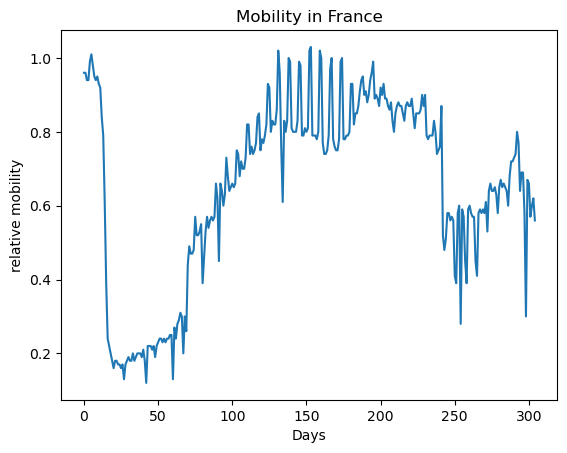

In [12]:
df=pd.read_csv('2020_FR_Region_Mobility_report.csv') # from https://www.google.com/covid19/mobility/ 
ar=np.array(df['transit_stations_percent_change_from_baseline'])
dat=np.array(df['date'])
df_france=df[['date', 'transit_stations_percent_change_from_baseline']][df['sub_region_1'].isnull()] # begins the 15 feb 2020
mob_france=np.array(df_france['transit_stations_percent_change_from_baseline'])[16:]
mob_france=mob_france/100 + 1

plt.plot(mob_france)
plt.xlabel('Days')
plt.ylabel('relative mobility')
plt.title('Mobility in France')

In [13]:
# set save_data=True to save the data
save_data=True
if save_data: 

    pd.DataFrame({'n_hospitalized': hosp_france[:305], 'n_infectious': n_infected_france[:305], 'mobility': mob_france, 'r_eff' : np.array([np.nan]* 305)}).T.to_csv('./all_pandemics/pandemic_test_france.csv')

ANALYSIS 

In [14]:
indexs_points=[[20*i] for i in range(1, 15) ]


In [15]:
dates=pd.date_range(start='2020-03-02', periods=306).date


In [16]:
colors_models={'ARIMA':'blue', 'Exponential':'teal', 'Moving Average':'green', 'SIRH1':'yellow', 'SIRH2':'orange', 'SIRH3':'purple', 'SIRH4':'pink', 'Linear Regression':'brown', 'Bayesian Regression':'black', 'VAR':'gray', 'Exponential Multi':'olive', 'Moving Average Multi':'green', 'SIRH Multi1':'cyan', 'SIRH Multi2':'magenta'}

execute "python global_comparison.py mob pand" to get the data and the next celle analyzes it 

In [17]:
def plot_all(mob, pand, ylims=(-100,3000)):
    for loss in ['RMSE']: 
        for reach in ['7', '14']:
            fig, ax = plt.subplots(figsize=(16, 8))
            df= pd.read_csv('all_pandemics/pandemic_'+mob+'_'+pand+'.csv')
            df.drop('Unnamed: 0', axis=1, inplace=True)
            df.index=['n_hospitalized', 'n_infected', 'mobility', 'R_eff']
            hospi=np.array(df.loc['n_hospitalized'])
            ax.plot(hospi[:300], label='Real values')
            if reach=='7':
                coefs=coefs_7_days
                intercept=intercept_7_days
            else:
                coefs=coefs_14_days
                intercept=intercept_14_days
            
                
            # df_results=pd.DataFrame(np.zeros((14, 13)))    # 14 points and 13 models 
            df_results=pd.DataFrame(np.ones((14, 14))*500)    # 14 points and 14 models 
            df_results.index=[str(20*i) for i in range(1, 15)]
            df_results.columns = list_models + ['Ensemble']
            # mob='final'
            # pand='test'
            name='evaluation_with_'+loss+'_of_1D_models_on_pandemic_'+str(mob)+'_'+str(pand)+'_and_reach_='+reach+'.csv'
            dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
            dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
            dicoresults=concat_dico(dicoresults1, dicoresults2)
            df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
            df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
            df.drop(['Unnamed: 0'], axis=1, inplace=True)
            n_hospitalized = np.array(df.loc['n_hospitalized'])
            r_eff=np.array(df.loc['r_eff'])
            indexs_points=[[20*i] for i in range(1, 15) ] 
            prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
            prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
            prediction.index=[20*i for i in range(1, 15)]
            prediction_all=prediction
            prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi', 'Moving Average Multi'], axis=1)
            
            prediction=prediction_bis
            for point in indexs_points: 
                real_value=prediction_all['Real values'].loc[point[0]]
                assert real_value==hospi[point[0]+int(reach)-1]
                ensemble_value=np.matmul(np.array(prediction.loc[point[0]]), coefs) +intercept
                ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                pred_all_without_real_values=prediction_all.drop(columns=['Real values', 'Moving Average Multi'])
                preds=(pred_all_without_real_values.loc[int(point[0])])
                names_models=preds.index

                for mycount in range(len(preds)): 
                    if point[0]==20: 
                        ax.plot(int(point[0]+int(reach)), preds[mycount],'o', color=colors_models[names_models[mycount]], label=names_models[mycount])
                    else : 
                        ax.plot(int(point[0]+int(reach)), preds[mycount],'o',  color=colors_models[names_models[mycount]])
            
                if point[0]==20:
                    ax.plot(int(point[0]+int(reach)), ensemble_value, 'ro', label='Ensemble')
                else :
                    ax.plot(int(point[0]+int(reach)), ensemble_value, 'ro')
                perfs=dicoresults[str(point)]
                assert(len(perfs)==14)
                assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                perfs.pop(11) # remove the moving average multi
                assert(len(perfs)==13)
                perfs.append(ensemble_perf)
                rankings=get_classement(perfs)
                df_results.loc[str(point[0])]=rankings
            ax.legend()
            ax.set_ylim(ylims)
            plt.title('Predictions of the models on real data for reach='+reach)
            plt.ylabel('Number of hospitalised patients')
            plt.xlabel('Day')
            ax.set_xticks([20*i for i in range(1, 15)], labels=[dates[[20*i for i in range(1, 15)]][j].strftime('%Y-%m-%d') for j in range(14)], rotation=45)
            # rotation: 
        
            plt.show()

            sns.heatmap(df_results, annot=True, cmap='coolwarm', fmt='g', yticklabels=[dates[[20*i for i in range(1, 15)]][j].strftime('%m-%d') for j in range(14)])
            plt.title('Rankings of the models on real data for '+loss+' and reach='+reach)
            plt.ylabel('Day')
            plt.yticks(ticks = [i-0.5 for i in range(1, 15)], labels=[dates[[20*i for i in range(1, 15)]][j].strftime('%m-%d') for j in range(14)])
            
            plt.show()

<>:62: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:62: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\grego\AppData\Local\Temp\ipykernel_18068\3239339598.py:62: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11]))


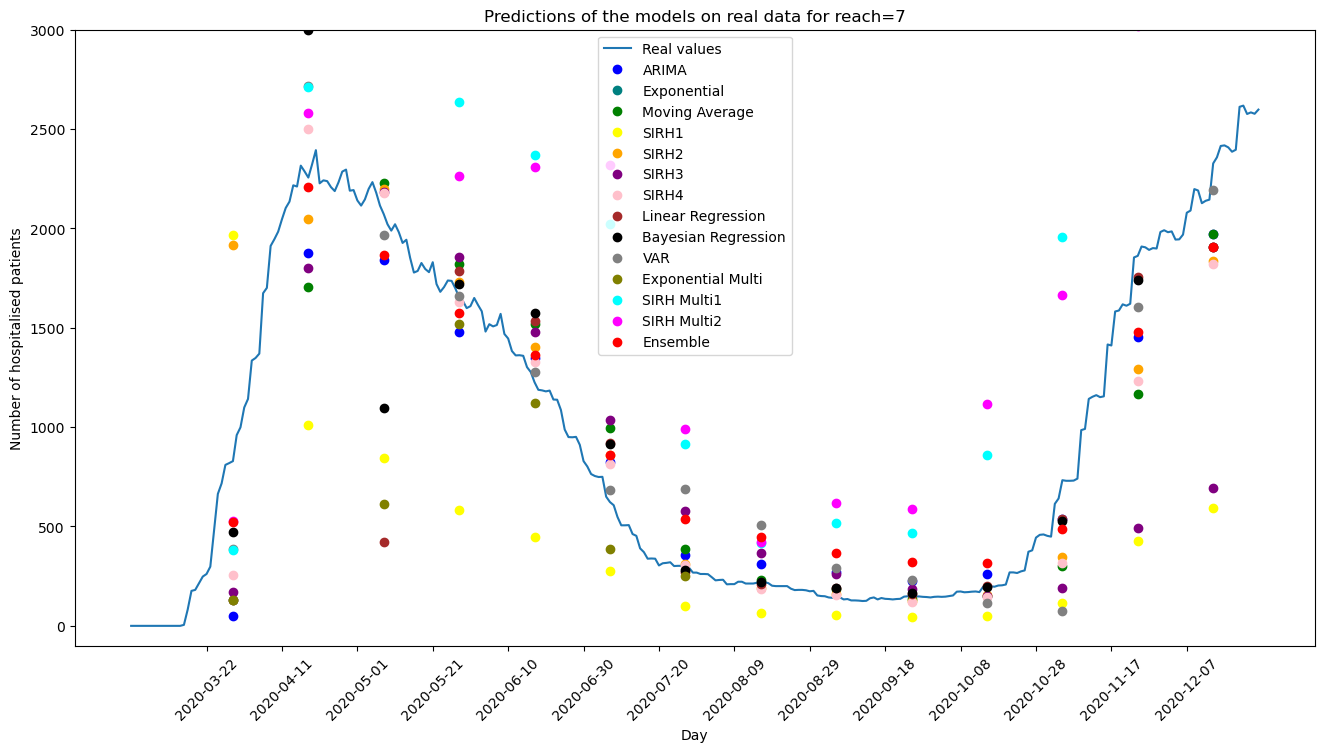

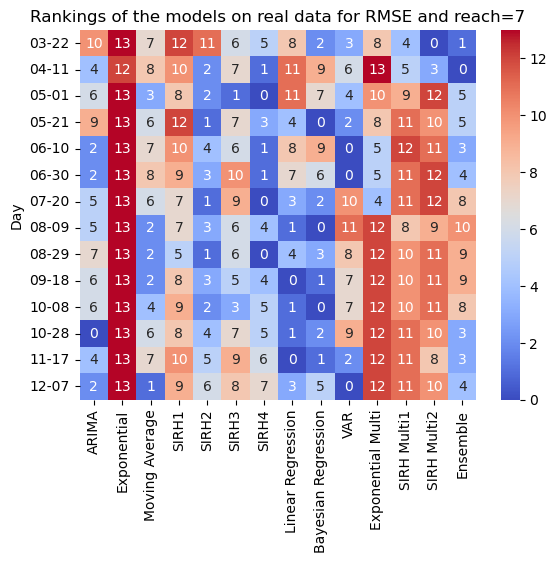

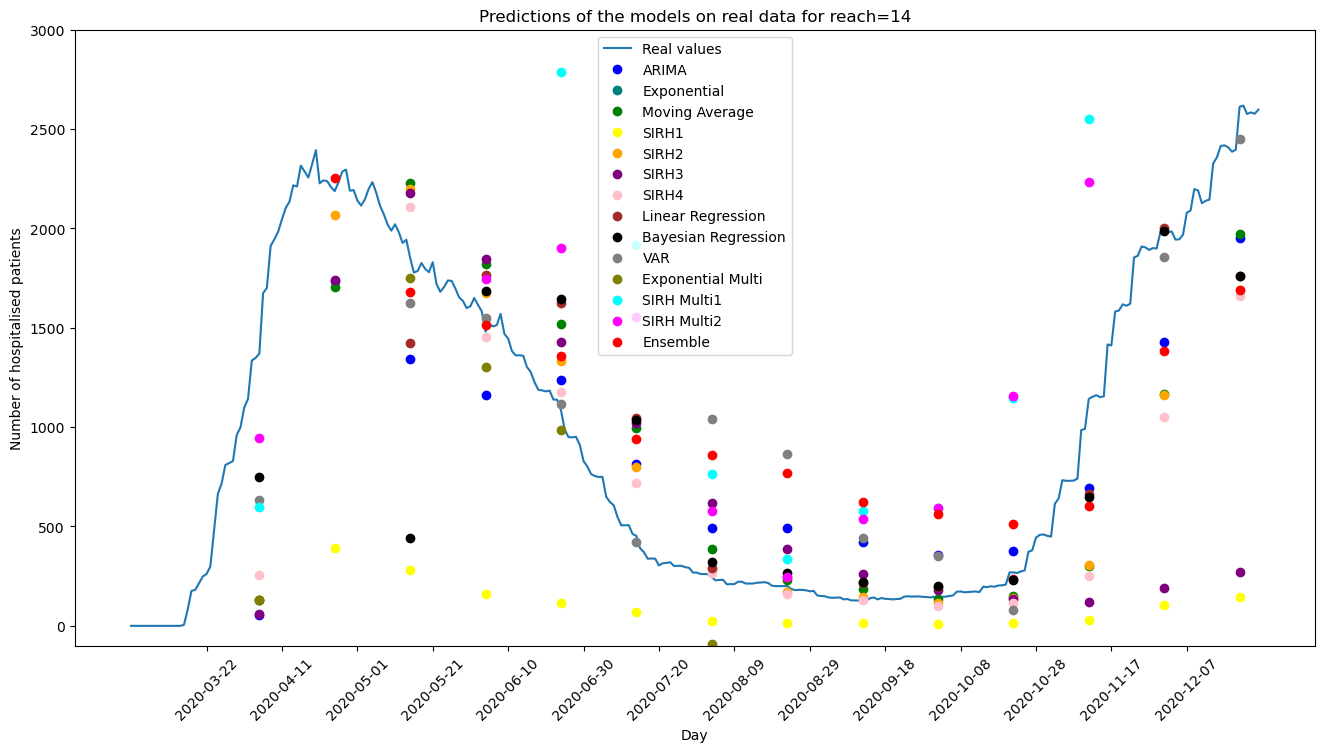

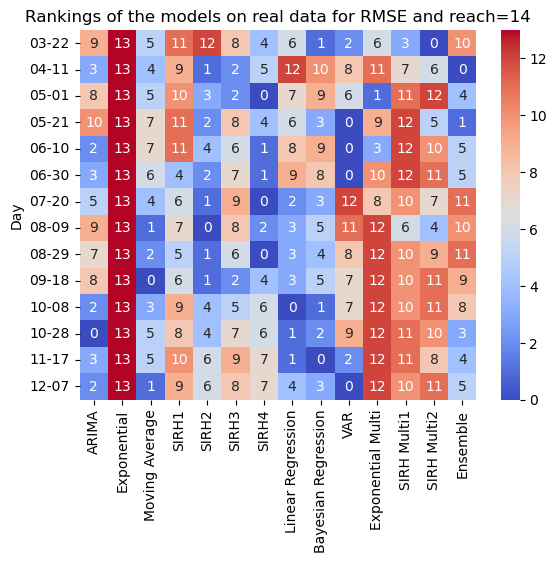

In [18]:
plot_all('final', 'test')

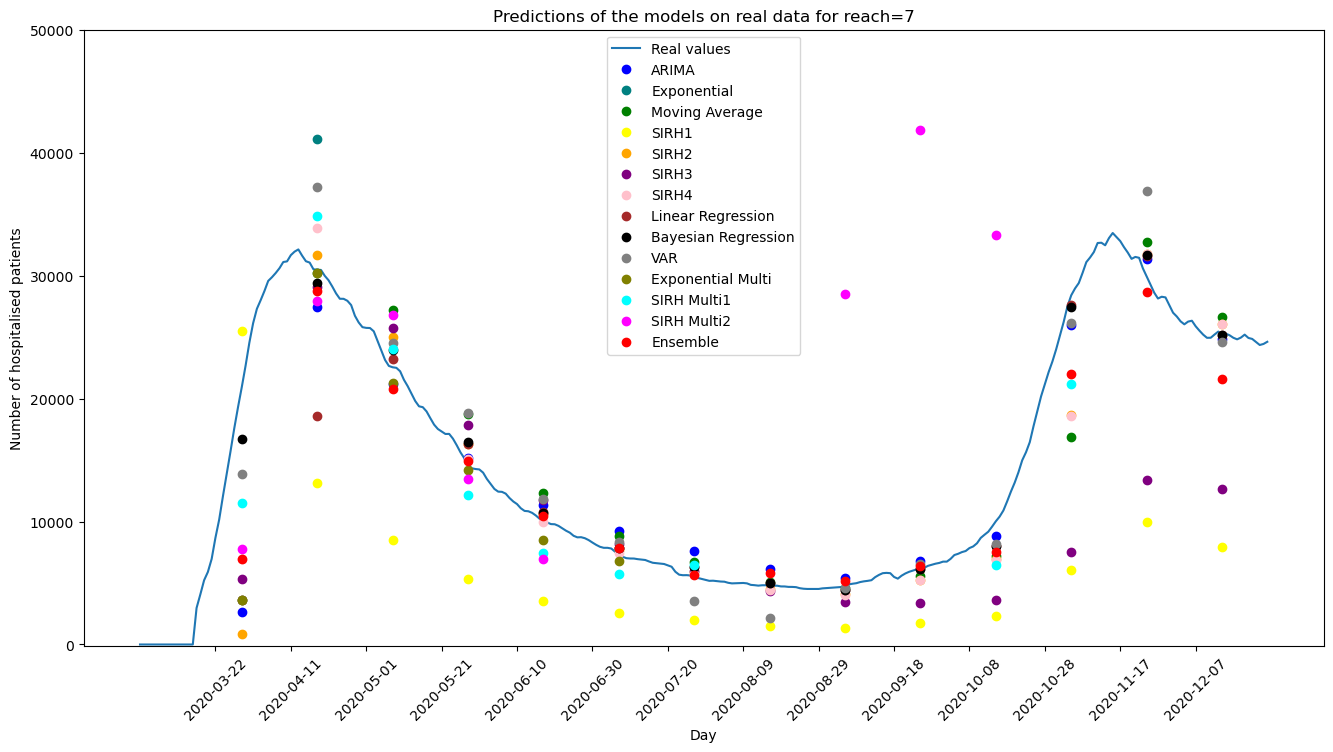

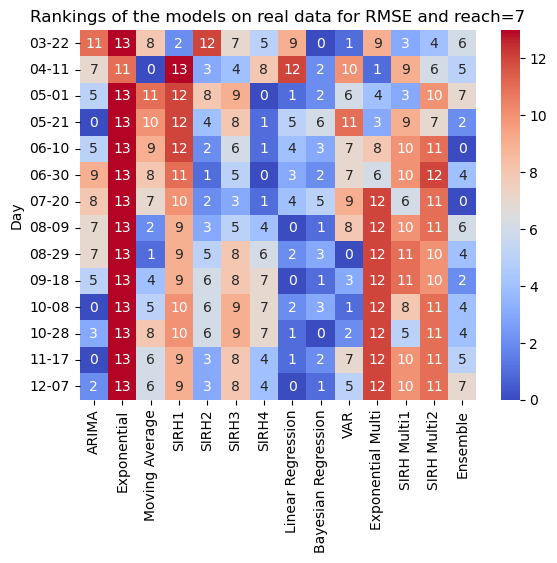

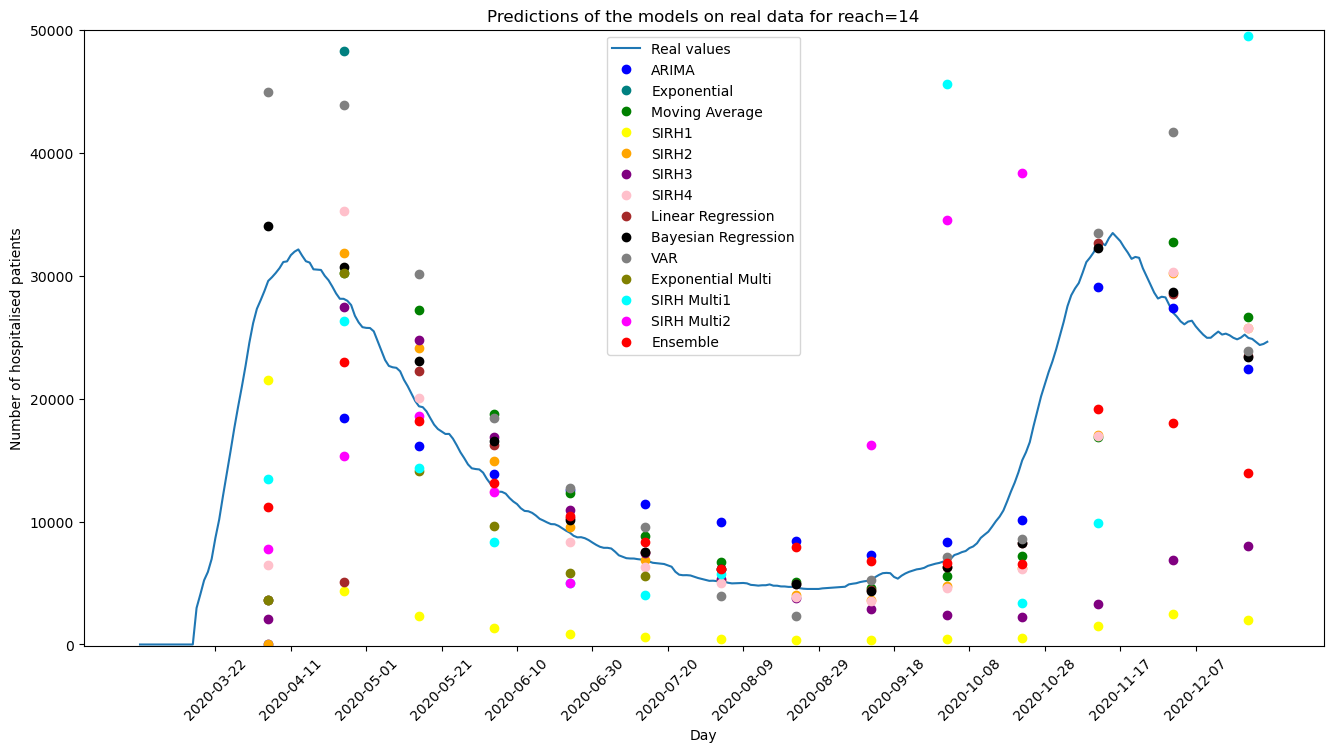

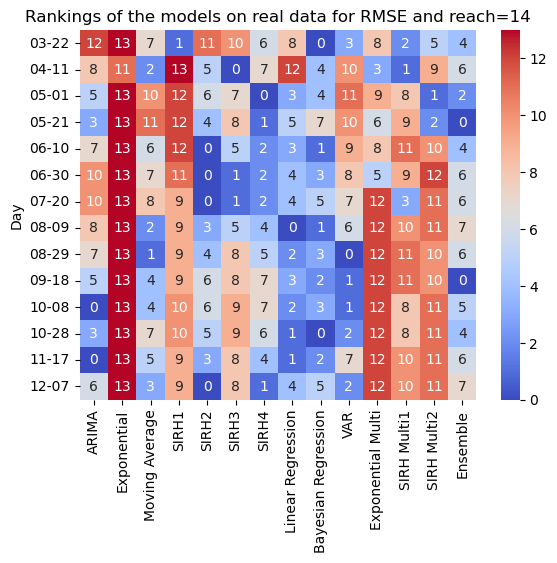

In [47]:
plot_all('test', 'france', (-100, 50000))